<a href="https://colab.research.google.com/github/fay-55/My_Projects/blob/main/EDA/_eda_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
pd.set_option("display.max_columns", None) # show all columns
pd.set_option("display.max_rows", None) # show all rows


In [ ]:
df = pd.read_csv('ecommerce.csv')

In [ ]:
df.sample(10)

InvoiceNo StockCode                          Description  Quantity  \
4081     577093     22385            JUMBO BAG SPACEBOY DESIGN        10   
951      551142    84558A         3D DOG PICTURE PLAYING CARDS         2   
4813     567180    84997B     CHILDRENS CUTLERY RETROSPOT RED          3   
1425     571909     22431           WATERING CAN BLUE ELEPHANT         1   
4571     552830     23192  BUNDLE OF 3 ALPHABET EXERCISE BOOKS        24   
3262     577837     23571        TRADITIONAL NAUGHTS & CROSSES        12   
2570     577519     21889               WOODEN BOX OF DOMINOES         3   
813      579196    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         1   
371      566557     23077                  DOUGHNUT LIP GLOSS        200   
2801     566190     23240     SET OF 4 KNICK KNACK TINS DOILY          2   

           InvoiceDate  UnitPrice  CustomerID         Country  
4081  11/17/2011 16:37       2.08       13089  United Kingdom  
951    4/26/2011 13:22       2.95       17613  United Kingdom  
4813   9/18/2011 14:56       4.15       17802  United Kingdom  
1425  10/19/2011 15:08       1.95       15006  United Kingdom  
4571   5/11/2011 13:49       1.65       15187  United Kingdom  
3262  11/22/2011 10:30       1.65       14834  United Kingdom  
2570  11/20/2011 13:20       1.25       15044  United Kingdom  
813   11/28/2011 15:54       7.46       14096  United Kingdom  
371    9/13/2011 11:47       1.04       14646     Netherlands  
2801    9/9/2011 13:20       4.15       12748  United Kingdom

In [ ]:
df.describe()

InvoiceNo     Quantity    UnitPrice    CustomerID
count    4870.000000  4870.000000  4870.000000   4870.000000
mean   560586.577413    12.945791     2.937057  15291.004312
std     13211.347819    38.145988     4.744515   1709.035002
min    536365.000000     1.000000     0.040000  12347.000000
25%    548861.000000     2.000000     1.250000  13975.000000
50%    561895.000000     5.000000     1.950000  15144.000000
75%    572126.000000    12.000000     3.750000  16793.250000
max    581585.000000   992.000000   145.000000  18283.000000

insight : Disini mean sama median kolom Quantity & Unit Price menandakan skewed

# Duplicate Handling

In [ ]:
# copy data untuk feature engineering
data = df.copy()

In [ ]:
len(data.drop_duplicates())/len(data)

1.0

insight : Karena hasilnya 1 dan bukan nol koma sekian, <br>
maka dipastikan data tersebut
**tidak ada duplikat**

# Missing Value Handling

In [ ]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
data[data.isna().any(axis=1)]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

In [ ]:
for col in data.columns:
  print(f"====={col}=====")
  print(data[col].value_counts())

=====InvoiceNo=====
InvoiceNo
562046    8
575491    7
576339    7
578270    7
559552    6
570488    6
567656    6
554275    6
537137    5
571909    5
578068    5
570818    5
563924    5
568346    5
579516    5
579196    5
571039    5
553035    5
580727    5
570672    5
565766    5
553067    5
571653    4
569653    4
571883    4
576857    4
575152    4
580527    4
537144    4
537868    4
545530    4
576053    4
579446    4
574481    4
577504    4
572669    4
566495    4
562031    4
554098    4
560271    4
546851    4
544790    4
568066    4
566290    4
563076    4
556056    4
572741    4
574714    4
551531    4
580136    4
569803    4
578045    4
558237    4
545690    4
571046    4
544316    4
569669    4
544450    4
560444    4
567170    4
575607    4
577029    4
572103    4
572873    3
576212    3
558200    3
569894    3
539041    3
574258    3
556102    3
547372    3
549730    3
578088    3
546133    3
568050    3
544463    3
537135    3
568781    3
561025    3
537209    3
573029    

Terdapat nilai missing value di beberapa kolom


In [ ]:
100 * len(data[data['StockCode'].isin(['M','C2'])]) / len(data)

0.09652509652509653

karena dibawah 20% maka missing value tidak perlu di handling

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    4870 non-null   int64  
 1   StockCode    4870 non-null   object 
 2   Description  4870 non-null   object 
 3   Quantity     4870 non-null   int64  
 4   InvoiceDate  4870 non-null   object 
 5   UnitPrice    4870 non-null   float64
 6   CustomerID   4870 non-null   int64  
 7   Country      4870 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 304.5+ KB


In [ ]:
# adjust the figure size for better readability
def check_plot(df, variable):
  plt.figure(figsize=(12,6))

# plotting
  features = ['Quantity','UnitPrice',]
  for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='red')
    plt.tight_layout()

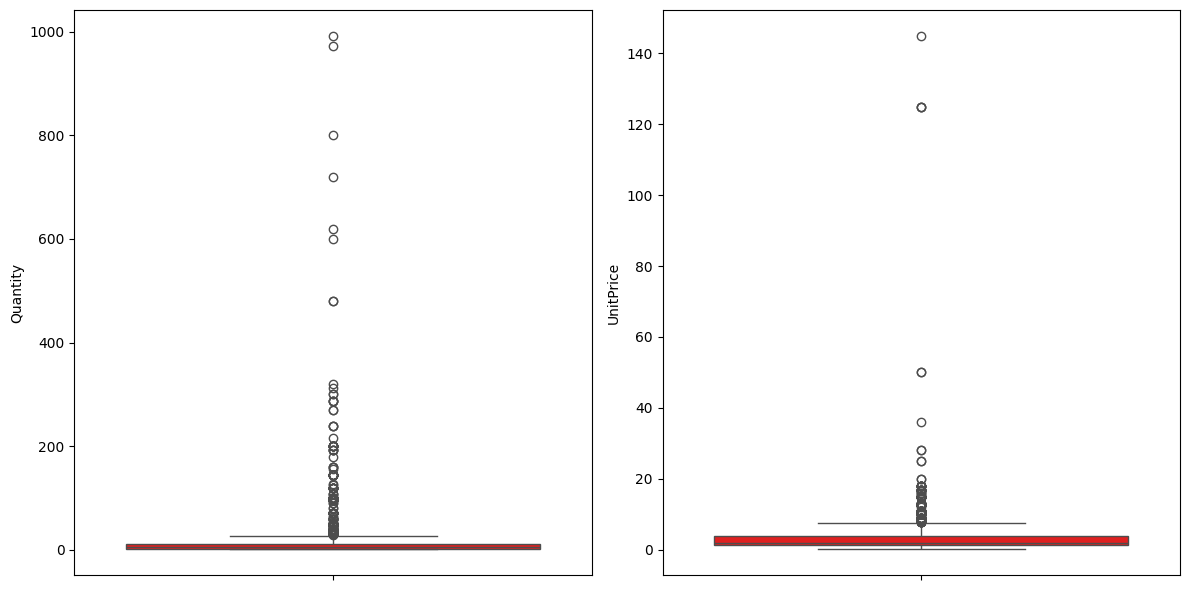

In [ ]:
check_plot(df,'features')

Terdapat banyak outlier, maka dilakukan handling

In [ ]:
def find_outlier_boundary(data, variable):

    # Mari kita hitung batas luar yang merupakan outlier

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary


In [ ]:
find_outlier_boundary(data, 'Quantity')

(27.0, -13.0)

In [ ]:
find_outlier_boundary(data, 'UnitPrice')

(7.5, -2.5)

In [ ]:
quantity_upper_limit, quantity_lower_limit = find_outlier_boundary(data, 'Quantity')
quantity_upper_limit, quantity_lower_limit

(27.0, -13.0)

In [ ]:
UnitPrice_upper_limit, UnitPrice_lower_limit = find_outlier_boundary(data, 'UnitPrice')
UnitPrice_upper_limit, UnitPrice_lower_limit

(7.5, -2.5)

In [ ]:
data= data[(data['Quantity'] <= quantity_upper_limit) & (data['Quantity'] >= quantity_lower_limit)]

In [ ]:
data= data[(data['UnitPrice'] <= UnitPrice_upper_limit) & (data['UnitPrice'] >= UnitPrice_lower_limit)]

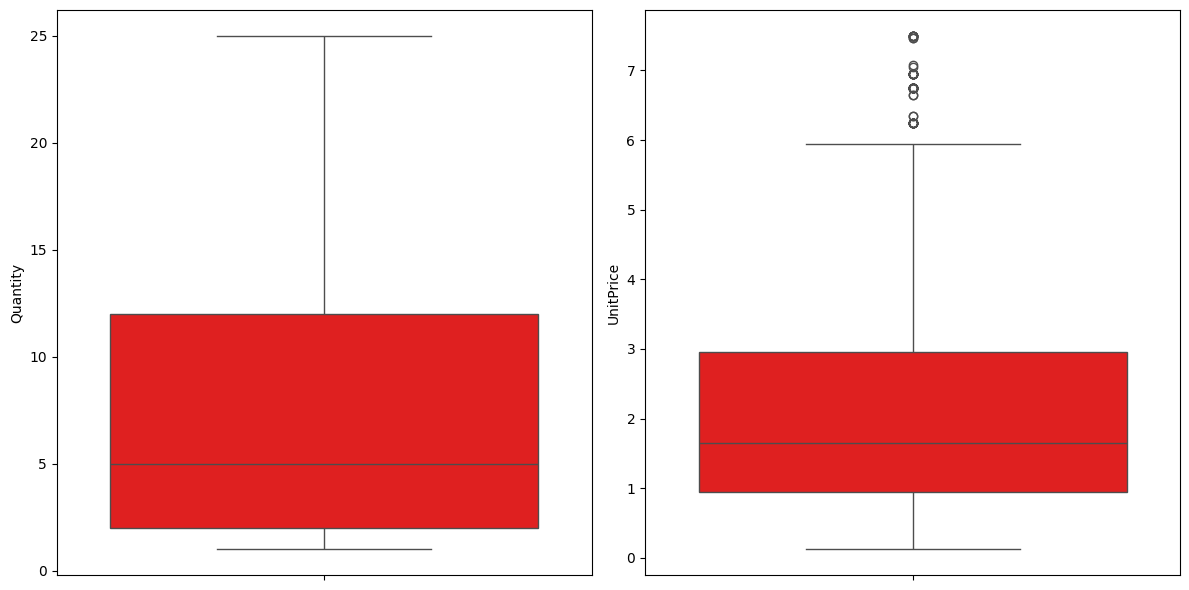

In [ ]:
check_plot(df,'features')

Setelah di handling outlier, boxplot tidak lagi tergencet, dan outlier di kolom unitprice masih bisa digunakan untuk EDA

## Alasan tidak melakukan encoding dan scaling
After we look at and investigate each column, there are 2 things we can get:
- Kolom kategoris berisi berbagai informasi, dan lebih mudah dipahami dengan data awalnya.
- Kolom numerik `semuanya memiliki nilai yang wajar` dalam rentang nilai di setiap kolom dan memiliki definisi yang jelas dan rentang setiap kolom masih masuk akal sehingga batasan di setiap kolom tidak perlu melakukan Feature Scaling

# 2. Setelah melakukan feature engineering, Ikuti anjuran berikut :
- Buat 5 pertanyaan analisa
- jawab dengan pendekatan metode data manipulation (sorting, filtering, group by, pivot, melt, crosstab, working with datetime, dsb (sesuaikan dengan keperluan anda
- Buatlah visualisasi grafik supaya mempermudah dalam ekstraksi insight setelah menjawab menggunakan metode data manipulation diatas
- Tulis insight anda

`poin` :
- insight / observation : **10 poin (1 pertanyaan 2 poin)**
- pertanyaan analisis dan jawaban metode data manipulation : **30 poin (1 pertanyaan 7 poin)**
- data visualisasi : **30 poin (1 visualisasi dari 1 pertanyaan 7 poin)**

## Berikut 5 pertanyaan analisis yaitu: <br>

1.)   Apa 5 kode stok barang yang paling banyak terjual berdasarkan total kuantitas? (metod .groupby, .sum, .sort_values)<br>
2.)   Negara apa saja yang melakukan pembelian terbanyak, dan barang apakah itu? (metod .groupby, .sum, .sort_values) <br>
3.)   hari apa yang memiliki penjualan terbanyak? (metod .to_datetime, .dt.day_name)<br>
4.)   Identifikasi harga barang tertinggi dan terendah menurut penjualan terbanyak (metod .agg) <br>
5.)   Identifikasi produk yang memiliki harga unit di atas rata-rata? (metod filtered)




In [ ]:
best_total_quantity = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(5)
best_total_quantity

Description
60 TEATIME FAIRY CAKE CASES            249
SET OF 4 PANTRY JELLY MOULDS           180
JAM MAKING SET PRINTED                 148
WOODEN HEART CHRISTMAS SCANDINAVIAN    133
VICTORIAN GLASS HANGING T-LIGHT        132
Name: Quantity, dtype: int64

**1) 5 barang terlaris berdasarkan total quantity :**

1. 60 TEATIME FAIRY CAKE CASES
2. SET OF 4 PANTRY JELLY MOULDS
3. JAM MAKING SET PRINTED
4. WOODEN HEART CHRISTMAS SCANDINAVIAN
5. VICTORIAN GLASS HANGING T-LIGHT


In [ ]:
best_country = data.groupby(['Description','Country'])['Quantity'].sum().sort_values(ascending=False).head(5)
best_country

Description                          Country       
60 TEATIME FAIRY CAKE CASES          United Kingdom    225
SET OF 4 PANTRY JELLY MOULDS         United Kingdom    180
WOODEN HEART CHRISTMAS SCANDINAVIAN  United Kingdom    133
VICTORIAN GLASS HANGING T-LIGHT      United Kingdom    132
JAM MAKING SET PRINTED               United Kingdom    124
Name: Quantity, dtype: int64

**2) negara apa saja yang melakukan pembelian terbanyak, dan barang apakah itu?**
- United Kingdom melakukan pembelian 5 barang terbanyak berdasarkan quantity, yaitu:  


1.   60 TEATIME FAIRY CAKE CASES
2.   SET OF 4 PANTRY JELLY MOULDS
3.   WOODEN HEART CHRISTMAS SCANDINAVIAN
4.   VICTORIAN GLASS HANGING T-LIGHT
5.   JAM MAKING SET PRINTED





In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df

InvoiceNo StockCode                          Description  Quantity  \
0        554697     21166           COOK WITH WINE METAL SIGN          1   
1        561038     82482    WOODEN PICTURE FRAME WHITE FINISH         2   
2        560552     23192  BUNDLE OF 3 ALPHABET EXERCISE BOOKS         1   
3        559884    85183B  CHARLIE & LOLA WASTEPAPER BIN FLORA        12   
4        544450     21789                   KIDS RAIN MAC PINK         3   
5        571046     23295     SET OF 12 MINI LOAF BAKING CASES         3   
6        537604     37446   MINI CAKE STAND WITH HANGING CAKES         8   
7        565200     23266  SET OF 3 WOODEN STOCKING DECORATION         1   
8        564167    85099F                 JUMBO BAG STRAWBERRY        10   
9        562888     22485        SET OF 2 WOODEN MARKET CRATES         2   
10       570503     21892   TRADITIONAL WOODEN CATCH CUP GAME          4   
11       551983     22485        SET OF 2 WOODEN MARKET CRATES         2   
12       580958     23332             IVORY WICKER HEART LARGE         6   
13       580727     22460       EMBOSSED GLASS TEALIGHT HOLDER        13   
14       547891     22383               LUNCH BAG SUKI DESIGN         10   
15       545978     22560           TRADITIONAL MODELLING CLAY         3   
16       555127     22817                   CARD SUKI BIRTHDAY        12   
17       569640     23197    SKETCHBOOK MAGNETIC SHOPPING LIST        36   
18       553198     22544                 MINI JIGSAW SPACEBOY        12   
19       565563     20982          12 PENCILS TALL TUBE SKULLS         1   
20       573909     23296       SET OF 6 TEA TIME BAKING CASES         1   
21       543631     21500                  PINK POLKADOT WRAP         25   
22       548870     21188   3D HEARTS  HONEYCOMB PAPER GARLAND         4   
23       545996     21679                     SKULLS  STICKERS         1   
24       561616     23338                  EGG FRYING PAN RED          2   
25       545681     22178      VICTORIAN GLASS HANGING T-LIGHT        12   
26       546920     22326  ROUND SNACK BOXES SET OF4 WOODLAND          6   
27       564733    82001S            VINYL RECORD FRAME SILVER         1   
28       545690     22079           RIBBON REEL HEARTS DESIGN          1   
29       561875     23311          VINTAGE CHRISTMAS STOCKING         24   
30       537888     22454          MEASURING TAPE BABUSHKA RED         6   
31       554816     23101        SILVER STARS TABLE DECORATION         3   
32       544700     22138        BAKING SET 9 PIECE RETROSPOT          2   
33       572741     23320         GIANT 50'S CHRISTMAS CRACKER        12   
34       568062     85015      SET OF 12  VINTAGE POSTCARD SET        24   
35       559109     22844     VINTAGE CREAM DOG FOOD CONTAINER         1   
36       543354     21916      SET 12 RETRO WHITE CHALK STICKS        24   
37       576062     23205      CHARLOTTE BAG VINTAGE ALPHABET          5   
38       562371     23202               JUMBO BAG VINTAGE LEAF        10   
39       568492     22727            ALARM CLOCK BAKELIKE RED          4   
40       549245     20728                  LUNCH BAG CARS BLUE         2   
41       577010     23159         SET OF 5 PANCAKE DAY MAGNETS         1   
42       577772     21210   SET OF 72 RETROSPOT PAPER  DOILIES        24   
43       543911     48138                   DOORMAT UNION FLAG         2   
44       579472     23326        HANGING MINI COLOURED BOTTLES         4   
45       568564     21926      RED/CREAM STRIPE CUSHION COVER          4   
46       570103     23196        VINTAGE LEAF MAGNETIC NOTEPAD         2   
47       557935     21755             LOVE BUILDING BLOCK WORD         6   
48       574726     22620          4 TRADITIONAL SPINNING TOPS         1   
49       542407     21673  WHITE SPOT BLUE CERAMIC DRAWER KNOB        12   
50       552852     22979              PANTRY WASHING UP BRUSH         6   
51       539728     22139     RETROSPOT TEA SET CERAMI

In [ ]:
df['DayName'] = df['InvoiceDate'].dt.day_name()
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0     554697     21166           COOK WITH WINE METAL SIGN          1   
1     561038     82482    WOODEN PICTURE FRAME WHITE FINISH         2   
2     560552     23192  BUNDLE OF 3 ALPHABET EXERCISE BOOKS         1   
3     559884    85183B  CHARLIE & LOLA WASTEPAPER BIN FLORA        12   
4     544450     21789                   KIDS RAIN MAC PINK         3   

          InvoiceDate  UnitPrice  CustomerID         Country    DayName  
0 2011-05-25 17:31:00       2.08       14584  United Kingdom  Wednesday  
1 2011-07-24 11:58:00       2.55       17114  United Kingdom     Sunday  
2 2011-07-19 12:54:00       1.65       15311  United Kingdom    Tuesday  
3 2011-07-13 11:34:00       1.25       16843  United Kingdom  Wednesday  
4 2011-02-20 12:23:00       0.85       17811  United Kingdom     Sunday

In [ ]:
daily_sales = df.groupby(df['DayName']).size().sort_values(ascending=False)
daily_sales

DayName
Thursday     975
Wednesday    862
Tuesday      828
Monday       784
Sunday       752
Friday       669
dtype: int64

**3) hari apa yang memiliki penjualan terbanyak?**
- Hari Kamis adalah hari dimana terjadi penjualan terbanyak

In [ ]:
min_max_sales = df.groupby('Description')['UnitPrice'].agg(['max', 'min', 'count']).sort_values(by='count', ascending=False).reset_index()
min_max_sales

Description     max     min  count
0                 JUMBO BAG RED RETROSPOT    2.08    1.65     24
1                           PARTY BUNTING    4.95    4.15     22
2                REGENCY CAKESTAND 3 TIER   12.75   10.95     21
3      WHITE HANGING HEART T-LIGHT HOLDER    3.20    2.55     19
4             60 TEATIME FAIRY CAKE CASES    1.25    0.42     18
5       SET OF 3 CAKE TINS PANTRY DESIGN     4.95    4.25     16
6            SET OF 4 PANTRY JELLY MOULDS    1.25    1.25     16
7             RED RETROSPOT CHARLOTTE BAG    0.85    0.72     15
8                  JAM MAKING SET PRINTED    1.45    1.45     15
9           ASSORTED COLOUR BIRD ORNAMENT    1.69    1.45     15
10          BAKING SET 9 PIECE RETROSPOT     4.95    4.25     14
11        PAPER CHAIN KIT 50'S CHRISTMAS     2.95    2.55     14
12                 JUMBO BAG VINTAGE LEAF    2.08    1.79     14
13                         SPOTTY BUNTING    4.95    4.95     14
14    SET/20 RED RETROSPOT PAPER NAPKINS     0.85    0.85     14
15      SET OF 6 SPICE TINS PANTRY DESIGN    3.95    3.95     13
16             LUNCH BAG SPACEBOY DESIGN     1.65    1.45     13
17                                POSTAGE   28.00    4.95     13
18        HAND OVER THE CHOCOLATE   SIGN     4.13    1.85     13
19       RETROSPOT HEART HOT WATER BOTTLE    4.95    4.95     13
20                  HEART OF WICKER LARGE    2.95    2.55     13
21             ALARM CLOCK BAKELIKE GREEN    3.75    3.75     13
22                LUNCH BAG  BLACK SKULL.    1.65    1.45     13
23                   JUMBO BAG STRAWBERRY    2.08    1.65     12
24                     JUMBO BAG ALPHABET    2.08    1.79     12
25                 LUNCH BAG SUKI DESIGN     1.65    1.45     12
26                LUNCH BAG PINK POLKADOT    1.65    1.65     12
27                LUNCH BAG RED RETROSPOT    1.65    1.45     12
28        VICTORIAN GLASS HANGING T-LIGHT    1.95    1.06     12
29            WOODEN FRAME ANTIQUE WHITE     2.95    2.55     12
30       PLASTERS IN TIN VINTAGE PAISLEY     1.65    1.65     12
31                    LUNCH BAG CARS BLUE    1.65    1.65     12
32                  HEART OF WICKER SMALL    1.65    1.65     12
33                JUMBO BAG PINK POLKADOT    2.08    1.79     11
34        CLOTHES PEGS RETROSPOT PACK 24     1.65    1.45     11
35             COOK WITH WINE METAL SIGN     2.41    1.95     11
36           TRAVEL CARD WALLET KEEP CALM    0.42    0.42     11
37                 LUNCH BAG APPLE DESIGN    1.65    1.65     11
38           PLEASE ONE PERSON METAL SIGN    2.10    1.53     11
39                     VINTAGE SNAP CARDS    0.85    0.72     10
40             HOT WATER BOTTLE KEEP CALM    4.95    4.95     10
41         JUMBO  BAG BAROQUE BLACK WHITE    2.08    1.79     10
42                  DOORMAT RED RETROSPOT    8.25    6.75     10
43                 PLASTERS IN TIN SKULLS    1.65    1.45     10
44        NATURAL SLATE HEART CHALKBOARD     5.79    2.95     10
45                       JUMBO BAG APPLES    2.08    1.75     10
46              ALARM CLOCK BAKELIKE RED     3.75    3.75     10
47                         POPCORN HOLDER    1.63    0.72     10
48                     RABBIT NIGHT LIGHT    4.13    1.79     10
49                 HAND WARMER OWL DESIGN    2.10    1.85     10
50               JAM MAKING SET WITH JARS    4.25    3.75     10
51               RED RETROSPOT CAKE STAND   10.95   10.95     10
52                 WOODLAND CHARLOTTE BAG    0.85    0.72     10
53      WOODEN PICTURE FRAME WHITE FINISH    2.95    2.55     10
54              LUNCH BAG ALPHABET DESIGN    1.65    1.65     10
55         PACK OF 60 DINOSAUR CAKE CASES    0.55    0.55      9
56         PINK REGENCY TEACUP AND SAUCER    2.95    2.55      9
57               JUMBO BAG VINTAGE DOILY     2.08    2.08      9
58                   IVORY KITCHEN SCALES    8.50    7.65      9
59              WOODEN UNION JACK BUNTING    5.95    5.95      9
60                 JUMBO STORAGE BAG SUKI    2.08    1.65      9


4) Identifikasi harga barang tertinggi dan terendah, menurut penjualan terbanyak:

*   JUMBO BAG RED RETROSPOT = penjualan harga terbanyak, dengan harga tertinggi 2.08 dan harga terendah 1.65



In [ ]:
df_filtered = data[data['UnitPrice'] > data['UnitPrice'].mean()]
df_filtered.head()

InvoiceNo StockCode                          Description  Quantity  \
1      561038     82482    WOODEN PICTURE FRAME WHITE FINISH         2   
13     580727     22460       EMBOSSED GLASS TEALIGHT HOLDER        13   
22     548870     21188   3D HEARTS  HONEYCOMB PAPER GARLAND         4   
26     546920     22326  ROUND SNACK BOXES SET OF4 WOODLAND          6   
27     564733    82001S            VINYL RECORD FRAME SILVER         1   

        InvoiceDate  UnitPrice  CustomerID         Country  
1   7/24/2011 11:58       2.55       17114  United Kingdom  
13  12/5/2011 17:17       2.46       14096  United Kingdom  
22   4/4/2011 14:41       2.95       14606  United Kingdom  
26   3/18/2011 9:55       2.95       12471         Germany  
27  8/28/2011 13:18       3.75       17841  United Kingdom

5.)   Identifikasi beberapa produk yang memiliki harga unit di atas rata-rata:
- WOODEN PICTURE FRAME WHITE FINISH, EMBOSSED GLASS TEALIGHT HOLDER, dan 3D HEARTS HONEYCOMB PAPER GARLAND



## 3. Lakukan analisa multivariate pada kolom numerikal berupa :
- Pairplot + insight / observation **(5 poin)**
- Correlation Heatmap + insight / observation **(5 poin)**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# pairplot of the data
sns.pairplot(features)

TypeError: 'data' must be pandas DataFrame object, not: <class 'list'>

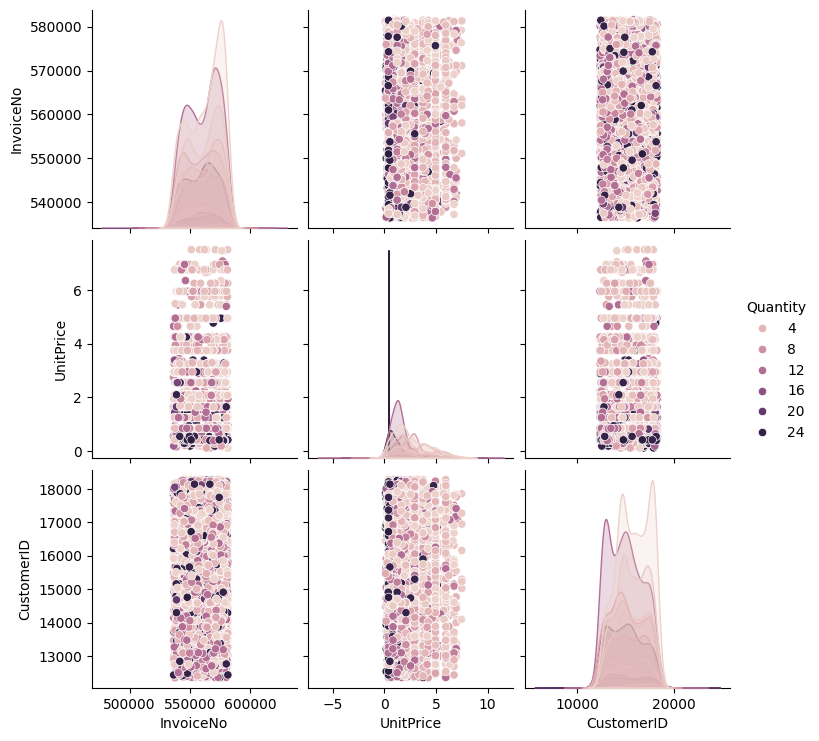

In [ ]:
# pairplot of the data
sns.pairplot(data, hue='Quantity')

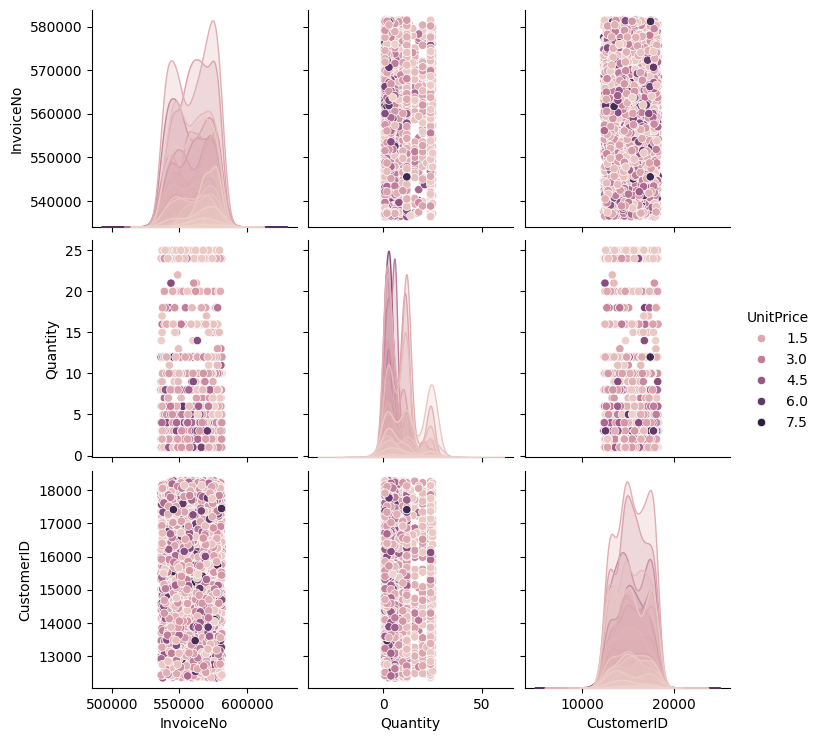

In [ ]:
# pairplot of the data
sns.pairplot(data, hue='UnitPrice')

In [ ]:
numericals = ['Quantity','UnitPrice']

# insight : Semakin tinggi Quantity, semakin tinggi pula UnitPrice. adanya korelasi positif yang kuat antara kedua variabel.

In [ ]:
numeric_columns = data.select_dtypes(include=['number']).columns
numeric_columns

Index(['InvoiceNo', 'Quantity', 'UnitPrice', 'CustomerID'], dtype='object')

In [ ]:
features = numericals

<Axes: >

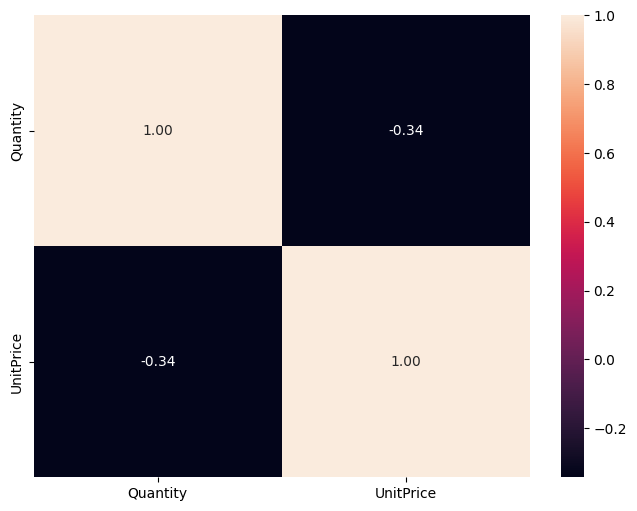

In [ ]:
# correlation heatmap
plt.figure(figsize=(8,6))
correlation = data[numericals].corr()
sns.heatmap(correlation, annot=True, fmt='.2f')


# Insight : Nilai korelasi antara Quantity dan UnitPrice adalah 1.0, yang menunjukkan korelasi positif yang sangat kuat. Ini berarti semakin tinggi Quantity, semakin tinggi pula UnitPrice, dan sebaliknya.